# Chetverikov/Shang HW 2
## Sam Borghese

In [1]:
import numpy as np
from sklearn import datasets
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
boston = datasets.load_boston()
labels = boston.feature_names
X = boston.data 
Y = boston.target

# As a function

In [2]:
def ForwardSelection(X,Y,labels):
    labels_small = labels
    X_small = X
    while len(labels_small) !=0: # run until all variables are selected
        MSEs = []
        if len(labels_small) == len(labels): #check to see if it the first variable removed
            for i in range(len(labels_small)):  # Here I replicate what was seen above to slect the first variable
                reg = LinearRegression() 
                x_alt = X_small[:,i].reshape(-1, 1) 
                reg.fit(x_alt,Y)        
                MSE = sklearn.metrics.mean_squared_error(Y, reg.predict(x_alt)) #Checks the fitted values against the true
                MSEs.append(MSE)
            I = MSEs.index(min(MSEs)) 
            ordered_vars = [labels_small[I]] # Variables in order selected by FS
            ordered_X = X[:,I].reshape(-1,1)  # X columns to correspond
            labels_small = np.delete(labels_small, I, axis=None) 
            X_small = np.delete(X, I, axis=1) 
            MinMSEs = [MSEs[I]]  # store the minimum MSE just for fun



        else:
            for i in range(len(labels_small)): 
                reg = LinearRegression() 
                x_alt = np.concatenate((ordered_X, X_small[:,i].reshape(-1, 1)), axis=1) #Include the previously selected variables
                reg.fit(x_alt,Y)        
                MSE = sklearn.metrics.mean_squared_error(Y, reg.predict(x_alt)) 
                MSEs.append(MSE)
            I = MSEs.index(min(MSEs)) 
            ordered_vars.append( labels_small[I])
            labels_small = np.delete(labels_small, I, axis=None)
            ordered_X = np.concatenate((ordered_X, X_small[:,I].reshape(-1,1)), axis=1)
            X_small = np.delete(X, I, axis=1)
            MinMSEs.append(MSEs[I])
            
    for i in range(1,len(ordered_vars)+1): #output the Results
        print("For", i, "variables FS choice,",ordered_vars[:i] )
    
    return(MinMSEs, ordered_vars) 

# Results

In [3]:
(mse, ordered_vars)= ForwardSelection(X,Y,labels)

For 1 variables FS choice, ['LSTAT']
For 2 variables FS choice, ['LSTAT', 'RM']
For 3 variables FS choice, ['LSTAT', 'RM', 'PTRATIO']
For 4 variables FS choice, ['LSTAT', 'RM', 'PTRATIO', 'RAD']
For 5 variables FS choice, ['LSTAT', 'RM', 'PTRATIO', 'RAD', 'NOX']
For 6 variables FS choice, ['LSTAT', 'RM', 'PTRATIO', 'RAD', 'NOX', 'CHAS']
For 7 variables FS choice, ['LSTAT', 'RM', 'PTRATIO', 'RAD', 'NOX', 'CHAS', 'ZN']
For 8 variables FS choice, ['LSTAT', 'RM', 'PTRATIO', 'RAD', 'NOX', 'CHAS', 'ZN', 'CRIM']
For 9 variables FS choice, ['LSTAT', 'RM', 'PTRATIO', 'RAD', 'NOX', 'CHAS', 'ZN', 'CRIM', 'AGE']
For 10 variables FS choice, ['LSTAT', 'RM', 'PTRATIO', 'RAD', 'NOX', 'CHAS', 'ZN', 'CRIM', 'AGE', 'INDUS']
For 11 variables FS choice, ['LSTAT', 'RM', 'PTRATIO', 'RAD', 'NOX', 'CHAS', 'ZN', 'CRIM', 'AGE', 'INDUS', 'DIS']
For 12 variables FS choice, ['LSTAT', 'RM', 'PTRATIO', 'RAD', 'NOX', 'CHAS', 'ZN', 'CRIM', 'AGE', 'INDUS', 'DIS', 'B']
For 13 variables FS choice, ['LSTAT', 'RM', 'PTRATIO

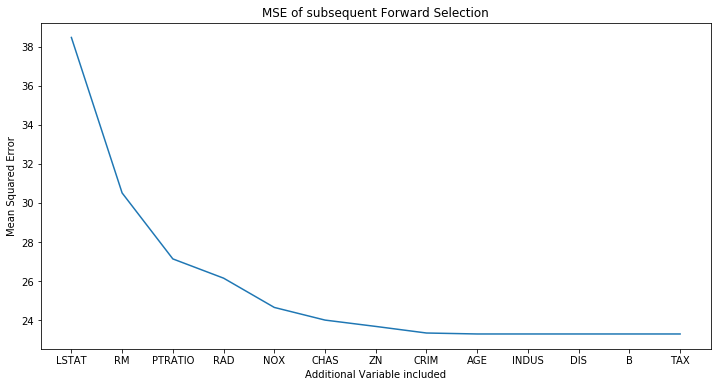

In [4]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(mse)
plt.xticks(ticks= range(13), labels= ordered_vars)
plt.ylabel("Mean Squared Error")
plt.xlabel("Additional Variable included")
plt.title("MSE of subsequent Forward Selection")
plt.show()